Lexical

In [ ]:
def jaccard_similarity(x,y):
  """ returns the jaccard similarity between two lists """
  intersection_cardinality = len(set.intersection(*[set(x), set(y)]))
  union_cardinality = len(set.union(*[set(x), set(y)]))
  return intersection_cardinality/float(union_cardinality)

In [12]:
sentences = ["The bottle is empty",
"There is nothing in the bottle"]
sentences = [sent.lower().split(" ") for sent in sentences]

print(sentences)
jaccard_similarity(sentences[0], sentences[1])


[['the', 'bottle', 'is', 'empty'], ['there', 'is', 'nothing', 'in', 'the', 'bottle']]


0.42857142857142855

In [25]:
#Eudlidean
#The larger the distance d between two vectors, the lower the similarity score and vice versa. 
from math import sqrt, pow, exp
 
def squared_sum(x):
  """ return 3 rounded square rooted value """
 
  return round(sqrt(sum([a*a for a in x])),3)
 
def euclidean_distance(x,y):
  """ return euclidean distance between two lists """
 
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [14]:
#!pip install -U pip setuptools wheel
#!pip install -U spacy
#!python -m spacy download en_core_web_sm
#!python -m spacy download en_core_web_md

     ---------------------------------------- 13.9/13.9 MB 2.6 MB/s eta 0:00:00


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ---------------------------------------- 45.7/45.7 MB 3.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [36]:
#To compute the Euclidean distance we need vectors, 
#so we’ll use spaCy’s in-built Word2Vec model to create text embeddings
sentences = ["haxiswindturbine	",
"anntemporaldomain"]
import spacy
# Load the spacy model installed
nlp = spacy.load('en_core_web_md')

embeddings = [nlp(sentence).vector for sentence in sentences]

distance = euclidean_distance(embeddings[0], embeddings[1])
print(distance)

0.0


In [37]:
#Euler’s constant to make sense of Euclidean distance
def distance_to_similarity(distance):
  return 1/exp(distance)

distance_to_similarity(distance)

1.0

In [38]:
def cos_similarity(x,y):
  """ return cosine similarity between two lists """
 
  numerator = sum(a*b for a,b in zip(x,y))
  denominator = squared_sum(x)*squared_sum(y)
  return round(numerator/float(denominator),3)

cos_similarity(embeddings[0], embeddings[1])

<ipython-input-38-0de18aa5761a>:6: RuntimeWarning: invalid value encountered in double_scalars
  return round(numerator/float(denominator),3)


nan

In [39]:
import scipy
from scipy.spatial import distance
cosine = scipy.spatial.distance.cosine(embeddings[0], embeddings[1])
cosine

nan

In [20]:
headlines = [
#Crypto
'Investors unfazed by correction as crypto funds see $154 million inflows',
'Bitcoin, Ethereum prices continue descent, but crypto funds see inflows',
 
#Inflation
'The surge in euro area inflation during the pandemic: transitory but with upside risks',
"Inflation: why it's temporary and raising interest rates will do more harm than good",
 
#common
'Will Cryptocurrency Protect Against Inflation?']

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
labels = [headline[:20] for headline in headlines]
 
def create_heatmap(similarity, cmap = "YlGnBu"):
  df = pd.DataFrame(similarity)
  df.columns = labels
  df.index = labels
  fig, ax = plt.subplots(figsize=(5,5))
  sns.heatmap(df, cmap=cmap)

In [23]:
nlp = spacy.load('en_core_web_md')
docs = [nlp(headline) for headline in headlines]


In [33]:
print(docs[0])
print(docs[0].vector)


Investors unfazed by correction as crypto funds see $154 million inflows
[-1.32749170e-01  9.37829912e-02  3.93491648e-02 -9.97920036e-02
 -4.79321666e-02 -9.83133446e-03 -1.03263997e-01 -4.94092442e-02
  5.76717518e-02  1.77677667e+00 -1.61077663e-01  2.65921235e-01
  1.19406998e-01  1.27821916e-03 -1.04942441e-01  4.72960770e-02
  2.44468302e-02  1.01040661e+00 -3.38651650e-02 -9.49004069e-02
 -2.65747476e-02  9.30060819e-02 -1.49500847e-01 -3.89503390e-02
 -4.39322181e-02  8.74256119e-02 -1.33601829e-01  1.63553411e-03
  3.71173359e-02  6.34159222e-02  2.36872192e-02  1.48108350e-02
  1.96008757e-01 -8.09659138e-02 -5.01842014e-02  8.30082372e-02
 -4.40448634e-02  6.38318136e-02  9.61926579e-02  1.54546583e-02
 -4.16026264e-02  4.01318669e-02  3.73055190e-01 -9.07565430e-02
 -1.77399680e-01  7.35053420e-02 -2.05449164e-02 -1.15668355e-02
 -2.18838170e-01 -5.89562543e-02 -5.79034798e-02  9.75728035e-02
 -2.35094354e-01  2.14538142e-01  5.73480017e-02 -1.32152602e-01
 -2.35557154e-01 

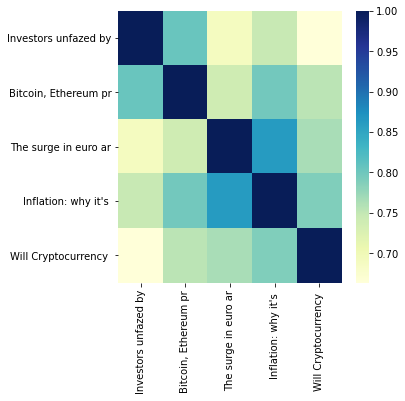

In [32]:
similarity = []
for i in range(len(docs)):
    row = []
    for j in range(len(docs)):
        row.append(docs[i].similarity(docs[j]))
    similarity.append(row)
create_heatmap(similarity)

In [6]:
# WE can also add levenshtein measure from Atit's code

Semantic Sim -- Gensim (We'll also use Wordnet from Atit's code)

In [1]:
#!pip install gensim~=3.8

     ---------------------------------------- 24.2/24.2 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.17
    Uninstalling Cython-0.29.17:
      Successfully uninstalled Cython-0.29.17


In [22]:
from re import sub
from gensim.utils import simple_preprocess

query_string = ['vegetables']
documents = ['tomatoes are fruit']

stopwords = ['the', 'and', 'are', 'a']

#Not very relevant. Getting rid of links and tokens
# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
def preprocess(doc):
    # Tokenize, clean up input document string
    doc = sub(r'<img[^<>]+(>|$)', " image_token ", doc)
    doc = sub(r'<[^<>]+(>|$)', " ", doc)
    doc = sub(r'\[img_assist[^]]*?\]', " ", doc)
    doc = sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', " url_token ", doc)
    return [token for token in simple_preprocess(doc, min_len=0, max_len=float("inf")) if token not in stopwords]

# Preprocess the documents, including the query string
corpus = [preprocess(document) for document in documents]
query = [preprocess(queries) for queries in query_string]

In [23]:

import gensim.downloader as api
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.models import WordEmbeddingSimilarityIndex
from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

# Load the model: this is a big file, can take a while to download and open
glove = api.load("glove-wiki-gigaword-50")    
similarity_index = WordEmbeddingSimilarityIndex(glove)

# Build the term dictionary, TF-idf model
dictionary = Dictionary(corpus+[query])
tfidf = TfidfModel(dictionary=dictionary)

# Create the term similarity matrix.  
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary, tfidf)

TypeError: decoding to str: need a bytes-like object, list found

In [4]:
#Finally, we calculate the soft cosine similarity between the query and each of the documents. 
#Unlike the regular cosine similarity (which would return zero for vectors with no overlapping terms), 
#the soft cosine similarity considers word similarity as well.
# Compute Soft Cosine Measure between the query and the documents.
# From: https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/soft_cosine_tutorial.ipynb
import numpy as np
query_tf = tfidf[dictionary.doc2bow(query)]

index = SoftCosineSimilarity(
            tfidf[[dictionary.doc2bow(document) for document in corpus]],
            similarity_matrix)

doc_similarity_scores = index[query_tf]
print(doc_similarity_scores)
# Output the sorted similarity scores and documents
#sorted_indexes = np.argsort(doc_similarity_scores)[::-1]
#for idx in sorted_indexes:
#    print(f'{idx} \t {doc_similarity_scores[idx]:0.3f} \t {documents[idx]}')

[0.         0.68772674]
1 	 0.688 	 tomatoes are actually fruit
0 	 0.000 	 cars drive on the road


C:\Users\Abel Teklearegay\anaconda3\lib\site-packages\gensim\similarities\termsim.py:358: RuntimeWarning: divide by zero encountered in true_divide
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))
C:\Users\Abel Teklearegay\anaconda3\lib\site-packages\gensim\similarities\termsim.py:358: RuntimeWarning: invalid value encountered in multiply
  Y = np.multiply(Y, 1 / np.sqrt(Y_norm))


In [7]:
#Pytorch and SentenceTransformers
#!pip install transformers

     ---------------------------------------- 4.0/4.0 MB 1.2 MB/s eta 0:00:00
     -------------------------------------- 895.2/895.2 KB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 77.9/77.9 KB 4.2 MB/s eta 0:00:00
     ---------------------------------------- 40.8/40.8 KB ? eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 20.4
    Uninstalling packaging-20.4:
      Successfully uninstalled packaging-20.4


In [8]:
#!pip3 install torch torchvision torchaudio

     -------------------------------------- 158.0/158.0 MB 2.7 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 2.1 MB/s eta 0:00:00
     -------------------------------------- 372.5/372.5 KB 3.9 MB/s eta 0:00:00


In [9]:
#!pip install sentence-transformers

     ---------------------------------------- 79.7/79.7 KB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 1.1/1.1 MB 2.6 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120751 sha256=320831ba7498f54b78fea46471c897958d59315c4381b7d2c98aaef4cc84a90b
  Stored in directory: c:\users\abel teklearegay\appdata\local\pip\cache\wheels\0c\b6\fb\2289a932c365293ad865fc1fe9d2db694d5584241c6d670874
Successfully built sentence-transformers


In [1]:
from sentence_transformers import SentenceTransformer, util
import numpy as np
model = SentenceTransformer('stsb-roberta-large')

In [16]:
sentence1 = "I like Python because I can build AI applications"
sentence2 = "I like Python because I can do data analytics"
# encode sentences to get their embeddings
embedding1 = model.encode(sentence1, convert_to_tensor=True)
embedding2 = model.encode(sentence2, convert_to_tensor=True)
# compute similarity scores of two embeddings
cosine_scores = util.pytorch_cos_sim(embedding1, embedding2)
print("Sentence 1:", sentence1)
print("Sentence 2:", sentence2)
print("Similarity score:", cosine_scores.item())

Sentence 1: good
Sentence 2: bad
Similarity score: 0.41997426748275757
